In [1]:
# imports
import dataloader as ds
import pandas as pd

In [2]:
# Define the file path and target folder
file_path = 'fer2013.tar.gz'

# unpack dataset
data_path = ds.unpack_tar_gz(file_path)

Target folder 'data' is not empty. Assuming the file is already unpacked.


In [3]:
import torchvision.transforms as transforms

# TODO does training and valid need to be transformed ?
# TODO chat gpt says yes
# TODO AUGMENTATION ONLY on training set

# Data augmentation and normalization for training
train_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])
# TODO use AUGMENTATION
train_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Just normalization for validation and testing
test_val_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

In [4]:
# data_path is declared while zipping the file
batch_size = 64

train_loader, valid_loader, test_loader = ds.get_dataloaders(data_path,train_transform, test_val_transform, batch_size)

            emotion
count  28709.000000
mean       3.317427
std        1.876632
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        6.000000
val mode activated
3589
           emotion
count  3589.000000
mean      3.360825
std       1.846366
min       0.000000
25%       2.000000
50%       3.000000
75%       5.000000
max       6.000000


In [5]:
print(len(train_loader))
print(len(valid_loader))
print(len(test_loader))


449
57
57


# todos
- [ ] convo filters
    - [ ] padding for borders?
- [ ] Max pooling -  used to downsample the image and reduce computational cost

In [6]:
import torch
import models as m


In [7]:
for images, labels in valid_loader:
    print(images.shape)  # This will print the shape of the input images for the first batch
    break  # Break the loop after printing the shape of the first batch
# torch.Size([64, 1, 48, 48])

torch.Size([64, 1, 48, 48])


In [8]:
print(len(valid_loader))  # Print the number of batches in the train DataLoader



57


In [9]:
model = m.SimpleCNN()

Validation: 100%|██████████| 57/57 [00:01<00:00, 28.54it/s, Val Loss=1.51]


Epoch 1/5, Loss: 1.7145, Val Loss: 1.5071


Validation: 100%|██████████| 57/57 [00:01<00:00, 28.68it/s, Val Loss=1.31]


Epoch 2/5, Loss: 1.4191, Val Loss: 1.3051


Validation: 100%|██████████| 57/57 [00:01<00:00, 28.79it/s, Val Loss=1.22]


Epoch 3/5, Loss: 1.2547, Val Loss: 1.2188


Validation: 100%|██████████| 57/57 [00:01<00:00, 28.98it/s, Val Loss=1.19]


Epoch 4/5, Loss: 1.1474, Val Loss: 1.1851


Validation: 100%|██████████| 57/57 [00:01<00:00, 29.42it/s, Val Loss=1.16]


Epoch 5/5, Loss: 1.0574, Val Loss: 1.1626


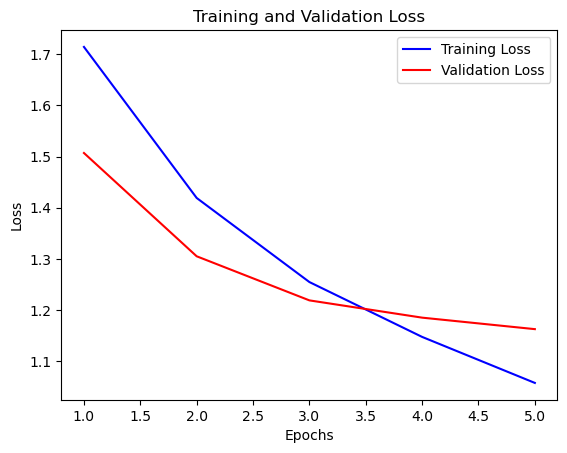

([1.7145063500096378,
  1.4191323578490447,
  1.2546836920995224,
  1.1473975994008156,
  1.0574221749082706],
 [1.5070613643579316,
  1.3050812273694758,
  1.2188332886026616,
  1.1850686564780117,
  1.1625960511073732])

In [10]:
import training as t

t.train(model, train_loader, valid_loader, 5)